In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from pybaseball import lahman
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
from scipy.special import expit
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pybaseball import statcast

In [3]:
data = pd.read_csv("data/finalprojectdata.csv")
data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,5/14/21,92.9,-0.80,5.90,"Civale, Aaron",664059,650644,double,hit_into_play,...,1,1,4,4,1,Infield shift,Standard,214.0,0.006,0.204
1,FF,5/14/21,89.5,1.61,6.14,"Kershaw, Clayton",547001,477132,field_out,hit_into_play,...,8,5,8,5,8,Standard,Standard,171.0,0.009,-0.145
2,SL,5/14/21,88.0,-1.66,5.96,"Glasnow, Tyler",624424,607192,field_out,hit_into_play,...,0,2,0,2,0,Infield shift,Strategic,60.0,0.020,-0.323
3,FF,5/14/21,89.0,-1.03,6.46,"Greinke, Zack",641432,425844,field_out,hit_into_play,...,10,3,10,3,10,Infield shift,Standard,194.0,0.000,-0.081
4,SI,5/14/21,91.9,-0.75,6.06,"Civale, Aaron",620443,650644,sac_fly,hit_into_play,...,1,1,4,4,1,Strategic,Standard,205.0,0.017,-0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27680,SI,4/1/21,94.2,-1.56,5.45,"Bassitt, Chris",514888,605135,field_out,hit_into_play,...,0,0,0,0,0,Infield shift,Standard,223.0,0.022,-0.225
27681,KC,4/1/21,84.1,-3.30,6.01,"Duffey, Tyler",456715,608648,single,hit_into_play,...,3,3,1,1,3,Standard,Standard,29.0,0.088,0.830
27682,CU,4/1/21,82.4,-2.06,6.15,"Green, Chad",666971,643338,grounded_into_double_play,hit_into_play,...,2,2,2,2,2,Standard,Standard,36.0,0.078,-0.332
27683,FC,4/1/21,93.5,-2.71,6.48,"Melancon, Mark",572233,453343,field_out,hit_into_play,...,8,7,8,7,8,Standard,Standard,184.0,0.071,-0.225


In [13]:
df = pd.get_dummies(data['events'])
df["home_run"]
data["home_run"] = df["home_run"]

0         0
1         0
2         0
3         0
4         0
         ..
175147    0
175148    0
175149    0
175150    0
175151    0
Name: home_run, Length: 175152, dtype: uint8

In [14]:
data["SprayAngle1"] = ((data["hc_x"]-125.42)/(198.27-data["hc_y"]))
data["SprayAngle2"] = np.arctan(data["SprayAngle1"])
data["SprayAngle"] = data["SprayAngle2"]*180/3.1415926535*.75
data["SprayAngle"]

0         17.666083
1         26.089251
2               NaN
3               NaN
4               NaN
            ...    
175147          NaN
175148          NaN
175149          NaN
175150          NaN
175151          NaN
Name: SprayAngle, Length: 175152, dtype: float64

In [15]:
hr_prediction_formula = "home_run ~ SprayAngle + launch_speed + launch_angle"
hr_prediction_model = smf.logit(formula=hr_prediction_formula,
                               data=data).fit()
hr_prediction_model.summary()

Optimization terminated successfully.
         Current function value: 0.106333
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               home_run   No. Observations:                29232
Model:                          Logit   Df Residuals:                    29228
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.4305
Time:                        21:08:23   Log-Likelihood:                -3108.3
converged:                       True   LL-Null:                       -5457.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -37.2034      0.845    -44.031      0.000     -38.859     -35.547
SprayAngle    7.673e-05      0.002      0.047      0.963      -0.003       0.003
launch_speed     0.3216      0.008     41.962      0.000       0.307       0.337
launch_angle     0.0865      0.003     34.189      0.000       0.082       0.091
================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='launch_angle'>

Text(0.5, 1.0, 'Histogram of Launch Angle and Number of Home Runs')

Text(0.5, 0, 'Launch Angle')

Text(0, 0.5, 'Home Runs')

<AxesSubplot:title={'center':'Histogram of Launch Angle and Number of Home Runs'}, xlabel='SprayAngle', ylabel='Home Runs'>

Text(0.5, 1.0, 'Histogram of Spray Angle and Number of Home Runs')

Text(0.5, 0, 'Spray Angle')

Text(0, 0.5, 'Home Runs')

<AxesSubplot:title={'center':'Histogram of Spray Angle and Number of Home Runs'}, xlabel='launch_speed', ylabel='Home Runs'>

Text(0.5, 1.0, 'Histogram of Launch Speed and Number of Home Runs')

Text(0.5, 0, 'Launch Speed')

Text(0, 0.5, 'Home Runs')

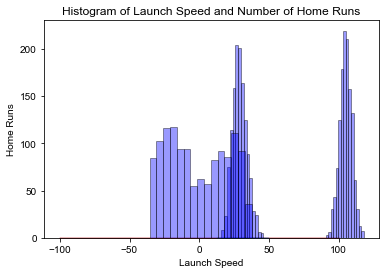

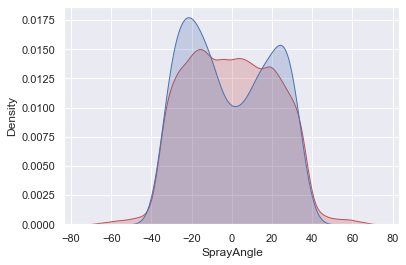

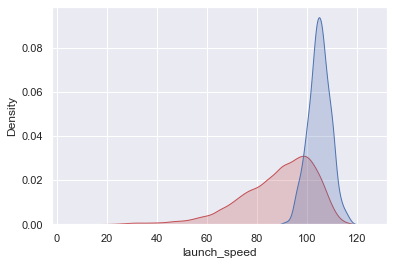

In [6]:
datahomeruns = data[(data.home_run == 1)]
sns.distplot(datahomeruns['launch_angle'], hist=True, kde=False,
             bins=int(180/12), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Launch Angle and Number of Home Runs')
plt.xlabel('Launch Angle')
plt.ylabel('Home Runs')

sns.distplot(datahomeruns['SprayAngle'], hist=True, kde=False,
             bins=int(180/12), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Spray Angle and Number of Home Runs')
plt.xlabel('Spray Angle')
plt.ylabel('Home Runs')

sns.distplot(datahomeruns['launch_speed'], hist=True, kde=False,
             bins=int(180/12), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Launch Speed and Number of Home Runs')
plt.xlabel('Launch Speed')
plt.ylabel('Home Runs')

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

fig = sns.kdeplot(data['launch_angle'], shade=True, color="r")
fig = sns.kdeplot(datahomeruns['launch_angle'], shade=True, color="b")
plt.show()

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

fig = sns.kdeplot(data['SprayAngle'], shade=True, color="r")
fig = sns.kdeplot(datahomeruns['SprayAngle'], shade=True, color="b")
plt.show()

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

fig = sns.kdeplot(data['launch_speed'], shade=True, color="r")
fig = sns.kdeplot(datahomeruns['launch_speed'], shade=True, color="b")
plt.show()